In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
import os

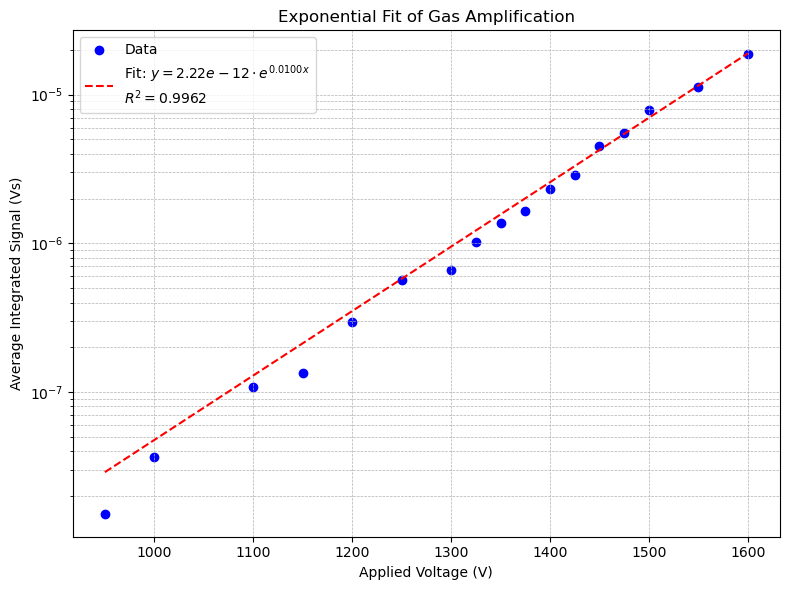

Fitted Equation: y = 2.22e-12 * exp(0.0100 * x)
R^2 = 0.9962


In [8]:
df = pd.read_csv('1a_average_integrated_signal-Copy1.csv') 

# Extract x and y
x = df['applied_voltage_V'].values
y = df['average_integrated_signal_Vs'].values

# Define the exponential function
def exp_func(x, K, C):
    return K * np.exp(C * x)

# Fit the model to the data
params, _ = curve_fit(exp_func, x, y, p0=(1e-9, 0.01))
K, C = params

# Calculate fitted values
y_fit = exp_func(x, K, C)

# Compute R^2
residuals = y - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_fit, label=fr'Fit: $y = {K:.2e} \cdot e^{{{C:.4f}x}}$' + f'\n$R^2 = {r_squared:.4f}$',
         color='red', linestyle='--')

plt.xlabel('Applied Voltage (V)')
plt.ylabel('Average Integrated Signal (Vs)')
plt.title('Exponential Fit of Gas Amplification')
plt.yscale('log')  # Log scale for better visualization
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Print R^2 and parameters
print(f"Fitted Equation: y = {K:.2e} * exp({C:.4f} * x)")
print(f"R^2 = {r_squared:.4f}")

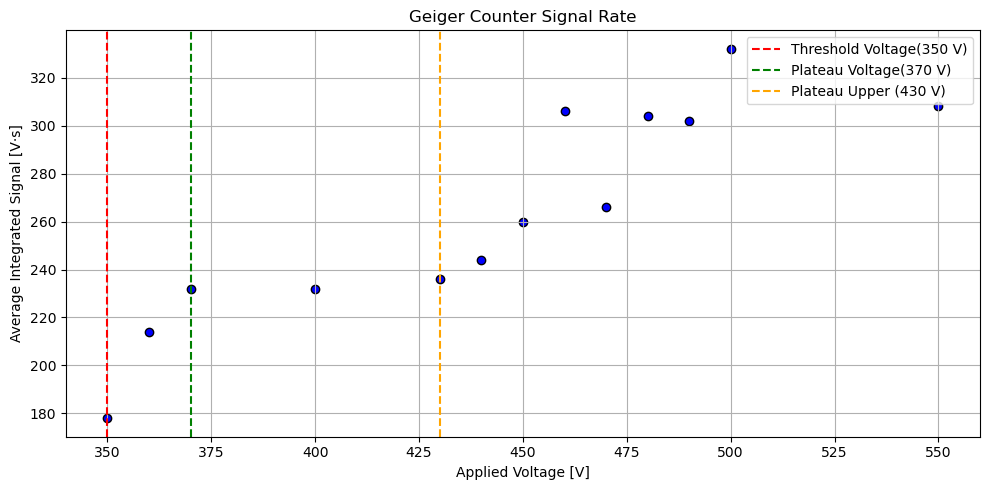

In [29]:
# Read the CSV file
df = pd.read_csv('2a_signal_rate-Copy1.csv')

# Extract x and y values
x = df['applied_voltage_V'].values
y = df['average_number_of_signals_per_second'].values

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, color='blue', edgecolor='black')

# Set plot labels and title
ax.set_xlabel("Applied Voltage [V]")
ax.set_ylabel("Average Integrated Signal [V·s]")
ax.set_title("Geiger Counter Signal Rate")

# Add grid
ax.grid(True)

ax.axvline(x=350, color='red', linestyle='--', linewidth=1.5, label='Threshold Voltage(350 V)')
ax.axvline(x=370, color='green', linestyle='--', linewidth=1.5, label='Plateau Voltage(370 V)')
ax.axvline(x=430, color='orange', linestyle='--', linewidth=1.5, label='Plateau Upper (430 V)')

# Ensure output directory exists
os.makedirs("2a", exist_ok=True)

# Save and show the plot
plt.tight_layout()
plt.savefig("2a/2a_signal_rate.png", dpi=300)
ax.legend()
plt.show()